## Image Classifier for Yelp Dataset using Inception V3

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import os

tf.test.gpu_device_name()

''

In [2]:
!pip install -q keras

In [3]:
# Set working directory deafult path
dir_path = "/Users/priyankasinghal/Desktop/Present_courses/CMPE256/Project/yelp_photos2"
os.chdir(dir_path)

# Step 1: Data Preprocessing and Analysis

## Step 1.1: Load the yelp image dataset

In [4]:
yelp_photo_df = pd.read_json ('photo.json', lines=True)
yelp_photo_df.head(3)

,business_id,caption,label,photo_id
0,rcaPajgKOJC2vo_l3xa42A,,inside,MllA1nNpcp1kDteVg6OGUw
1,Kn23LDd740SBVJ7mum0fwg,,inside,YjxBE88Bf6CmTEF2LP1UNA
2,ZkGDCVKSdf8m76cnnalL-A,,food,1f7izSjM0WjkDRIVbPy1yw


## Image classification class labels

In [5]:
# Get the unique values of 'label' column 
yelp_photo_df.label.unique()

array(['inside', 'food', 'outside', 'drink', 'menu'], dtype=object)

## Step 1.2: Create 5 folders to categorize image according to its label

In [ ]:
# declare variables
inside = []
outside = []
food = []
drink = []
menu = []

for index, row in yelp_photo_df.iterrows():
    if row['label'] == 'inside':
        inside.append(row['photo_id']+'.jpg')
    elif row['label'] == 'outside':
         outside.append(row['photo_id']+'.jpg')
    elif row['label'] == 'food':
         food.append(row['photo_id']+'.jpg')
    elif row['label'] == 'drink':
         drink.append(row['photo_id']+'.jpg')
    elif row['label'] == 'menu':
         menu.append(row['photo_id']+'.jpg')
    else:
        print("na")

In [ ]:
# Move inside photos to inside folder
import glob, shutil

source_folder = 'photos/*.jpg'
inside_dest_folder= 'photos/inside'

# Move a file from the directory source to dest
for file in glob.glob(source_folder):
    if os.path.basename(file) in inside:
        shutil.move(file, inside_dest_folder)

In [ ]:
# Move outside photos to outside folder
outside_dest_folder= 'photos/outside'

# Move a file from the directory source to dest
for file in glob.glob(source_folder):
    if os.path.basename(file) in outside:
        shutil.move(file, outside_dest_folder)

In [ ]:
# Move food photos to food folder
food_dest_folder= 'photos/food'

# Move a file from the directory source to dest
for file in glob.glob(source_folder):
    if os.path.basename(file) in food:
        shutil.move(file, food_dest_folder)

In [ ]:
# Move drink photos to drink folder
drink_dest_folder= 'photos/drink'

# Move a file from the directory source to dest
for file in glob.glob(source_folder):
    if os.path.basename(file) in drink:
        shutil.move(file, drink_dest_folder)

In [ ]:
# Move menu photos to menu folder
menu_dest_folder= 'photos/menu'

# Move a file from the directory source to dest
for file in glob.glob(source_folder):
    if os.path.basename(file) in menu:
        shutil.move(file, menu_dest_folder)

# Step 2: Split data into training and testing set

In [ ]:
# from glob import glob
# from sklearn.model_selection import train_test_split

# inside_train = glob('photos/train/inside/*.jpg')
# outside_train = glob('photos/train/outside/*.jpg')
# food_train = glob('photos/train/food/*.jpg')
# drink_train = glob('photos/train/drink/*.jpg')
# menu_train = glob('photos/train/menu/*.jpg')

# inside_train, inside_test = train_test_split(inside_set, test_size=0.20)
# outside_train, outside_test = train_test_split(outside_set, test_size=0.20)
# food_train, food_test = train_test_split(food_set, test_size=0.20)
# drink_train, drink_test = train_test_split(drink_set, test_size=0.20)
# menu_train, menu_test = train_test_split(menu_set, test_size=0.20)

In [6]:
from glob import glob
from sklearn.model_selection import train_test_split

inside_train = glob('photos/train/inside/*.jpg')
outside_train = glob('photos/train/outside/*.jpg')
food_train = glob('photos/train/food/*.jpg')
drink_train = glob('photos/train/drink/*.jpg')
menu_train = glob('photos/train/menu/*.jpg')

inside_test = glob('photos/test/inside/*.jpg')
outside_test = glob('photos/test/outside/*.jpg')
food_test = glob('photos/test/food/*.jpg')
drink_test = glob('photos/test/drink/*.jpg')
menu_test = glob('photos/test/menu/*.jpg')


## Step 2.1: Create Train and Test Directory

In [8]:
import glob

TRAIN_DIR = 'photos/train'
TEST_DIR = 'photos/test'

# # !mkdir photos/test

# # !mkdir photos/test/inside

# # Move inside photos to inside test folder
# inside_source_folder= 'photos/train/inside/*.jpg'
# inside_test_folder= 'photos/test/inside'
# # Move a file from the directory source to dest
# for file in glob.glob(inside_source_folder):
#     if file in inside_test:
#         shutil.move(file, inside_test_folder)


# # !mkdir photos/test/outside
# # Move outside photos to outside test folder
# outside_source_folder= 'photos/train/outside/*.jpg'
# outside_test_folder= 'photos/test/outside'
# # Move a file from the directory source to dest
# for file in glob.glob(outside_source_folder):
#     if file in outside_test:
#         shutil.move(file, outside_test_folder)


# # !mkdir photos/test/menu
# # Move menu photos to menu test folder
# menu_source_folder= 'photos/train/menu/*.jpg'
# menu_test_folder= 'photos/test/menu'
# # Move a file from the directory source to dest
# for file in glob.glob(menu_source_folder):
#     if file in menu_test:
#         shutil.move(file, menu_test_folder)


# # !mkdir photos/test/drink
# # Move drink photos to drink test folder
# drink_source_folder= 'photos/train/drink/*.jpg'
# drink_test_folder= 'photos/test/drink'
# # Move a file from the directory source to dest
# for file in glob.glob(drink_source_folder):
#     if file in drink_test:
#         shutil.move(file, drink_test_folder)


# # !mkdir photos/test/food
# # Move drink photos to food test folder
# food_source_folder= 'photos/train/food/*.jpg'
# food_test_folder= 'photos/test/food'
# # Move a file from the directory source to dest
# for file in glob.glob(food_source_folder):
#     if file in food_test:
#         shutil.move(file, food_test_folder)



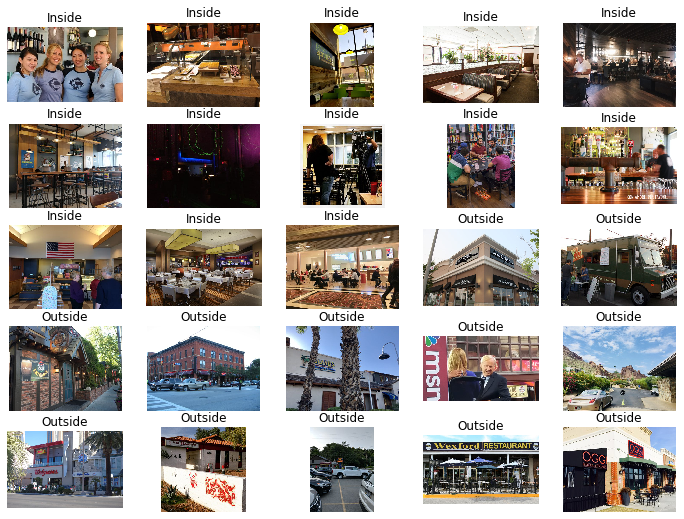

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

inside = np.random.choice(inside_train, 13)
outside = np.random.choice(outside_train, 12)
data = np.concatenate((inside, outside))
labels = 13 * ['Inside'] + 12 *['Outside']

N, R, C = 25, 5, 5
plt.figure(figsize=(12, 9))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

# Step 3: Inception V3 Model tuning

In [10]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 5
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.


In [11]:
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = 'photos/train'

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 159998 images belonging to 5 classes.
Found 40002 images belonging to 5 classes.


//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


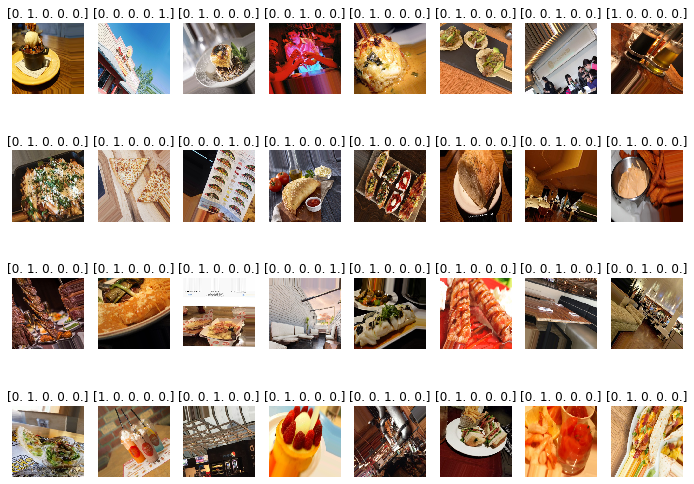

In [14]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.title(lbl)
    plt.imshow((img + 1) / 2)
    plt.axis('off')
    #print(lbl)

# Step 4: Save Trained model

In [17]:
EPOCHS = 5
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'filename.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

KeyboardInterrupt: 

In [ ]:
def plot_training(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

## Prediction of the custom model

In [ ]:
# See which class belongs to which label 
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.title(lbl)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("drink", "food", "inside", "menu", "outside")
    gs = gridspec.GridSpec(5, 1, height_ratios=[4, 4, 4, 4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1, 2, 3, 4], preds, alpha=0.5)
    plt.yticks([0, 1, 2, 3, 4], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [19]:
MODEL_FILE = 'filename.model'
model = load_model(MODEL_FILE)

array([4.6059974e-03, 1.6769938e-02, 9.6659487e-01, 9.1276175e-05,
       1.1938038e-02], dtype=float32)

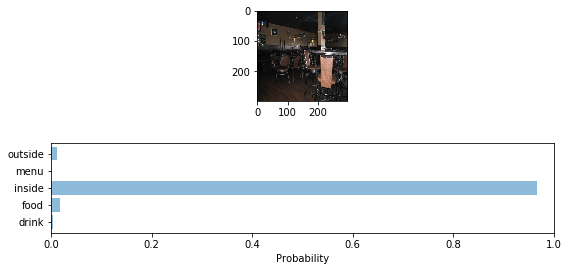

In [20]:
img1 = image.load_img('photos/test/inside/__13jmzpHK2ANn_HcVSQHQ.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img1)

plot_preds(np.asarray(img1), preds)
preds

array([7.6484746e-01, 2.3490344e-01, 1.6685374e-04, 2.7456491e-07,
       8.1965969e-05], dtype=float32)

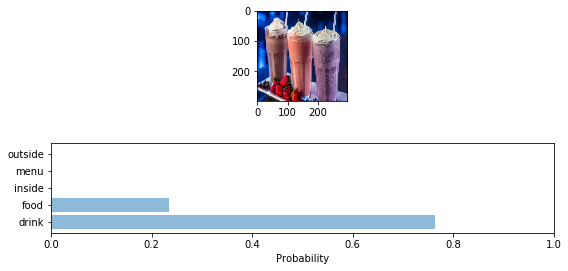

In [21]:
img2 = image.load_img('photos/test/drink/_DdKfpuTIZ-Bx3JIeotCNw.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img2)

plot_preds(np.asarray(img2), preds)
preds

array([7.3979504e-07, 1.0811007e-02, 1.8039311e-05, 9.8915792e-01,
       1.2318670e-05], dtype=float32)

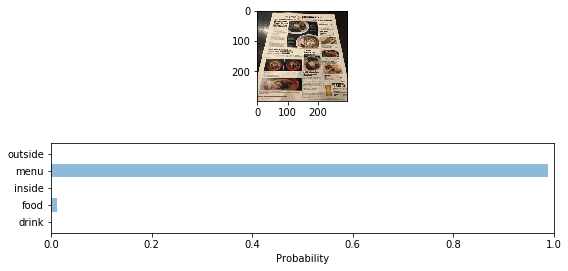

In [22]:
img3 = image.load_img('photos/test/menu/-QdDky3Thhpb1fb6dKhNdg.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img3)

plot_preds(np.asarray(img3), preds)
preds

array([3.0693289e-05, 2.3347042e-03, 5.6707401e-02, 1.0658169e-07,
       9.4092709e-01], dtype=float32)

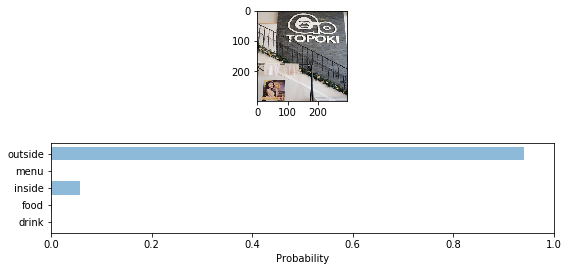

In [23]:
img4 = image.load_img('photos/test/outside/_JgEDKZ4DrmHHOtV4FEqww.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img4)

plot_preds(np.asarray(img4), preds)
preds